# GRO620 - Problématique

Voici le fichier de départ de la problématique. Si tout a été installé correctement, vous devriez voir apparaître la première image (DSCF8010.jpeg).

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print("GRO620 - Problématique")
print("OpenCV version", cv2.__version__)

%matplotlib inline

GRO620 - Problématique
OpenCV version 4.8.0


In [2]:
## Si vous utilisez Google Colab, vous devez d'abord monter votre Google Drive
## où se trouve vos données. 
## Commentez les trois lignes suivantes en ajustant le chemin vers votre propre
## dossier :

# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/gro620-e21

## Pour retrouver le chemin depuis Jupyter, vous pouvez utiliser ceci :
# !ls /content/gdrive/MyDrive


In [3]:
images_fn = os.listdir("photos_prob/")
print("%i photo(s) à traiter"%(len(images_fn)))
if (len(images_fn) == 0):
    print("ERREUR! Vérifiez que vous avez bien un dossier photos_prob au même endroit que ce calepin.")
    
images = []

for f in images_fn:
    img = cv2.imread(os.path.join("photos_prob/", f))
    images.append(img)

9 photo(s) à traiter


Affichons maintenant la première image à traiter:

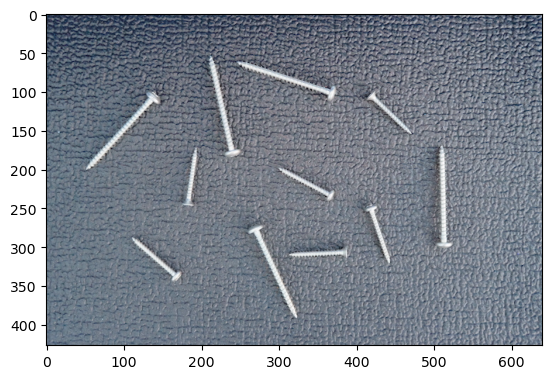

In [4]:
plt.imshow(images[0])

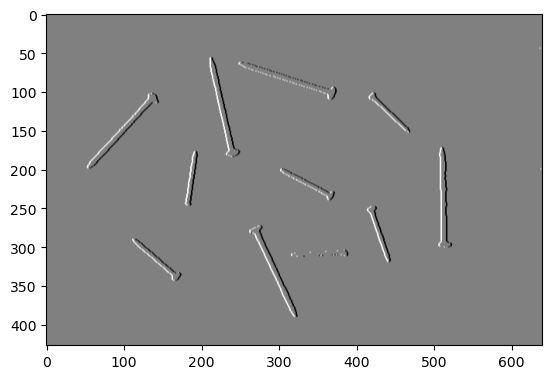

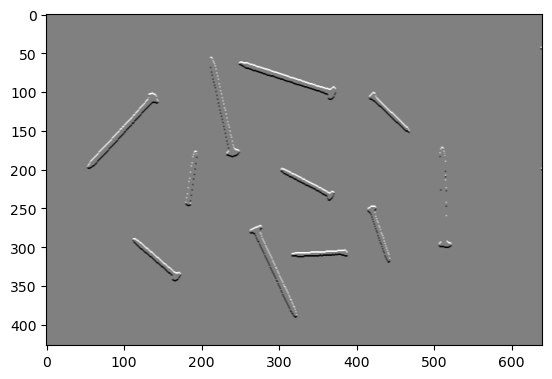

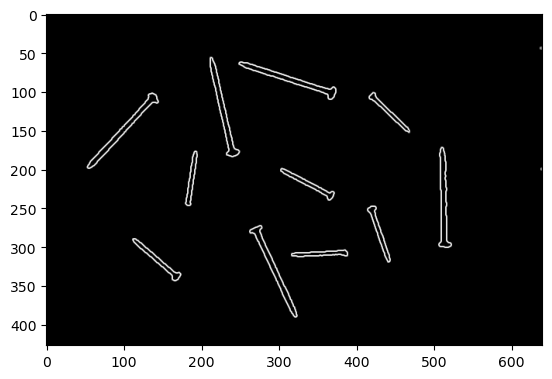

In [4]:
################################################################
#Dans cette partie du code, on isole les vis du reste du décors
################################################################

sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]) * (1/8.)

#On veut passer à gris afin que ce soit plus facile à analyser
img_gray = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
# plt.figure()
# plt.imshow(img_gray,cmap ="gray")

#Ici, on s'assure de faire une normalisation afin d'avoir toujours les même luminosité pour chaque image
img_float = np.float32(img_gray) / 255.0
img_float_bright = cv2.normalize(img_float, None, 0, 1, cv2.NORM_MINMAX)
# plt.figure()
# plt.imshow(img_float_bright, cmap ="gray")

#On utilise median blur pour enlever le bruit dans l'image
img_medblur = cv2.medianBlur(img_float_bright , 5)
# plt.figure()
# plt.imshow(img_medblur, cmap ="gray")

#On s'assure ensuite d'isoler les vis, celle qui ont plus de blanc du reste
ret, thresh1 = cv2.threshold(img_medblur, 0.68, 255, cv2.THRESH_BINARY)
# plt.figure()
# plt.imshow(thresh1, cmap ="gray")

#On apllique sobel dans les deux direction afin de réduire le nombre d'opération et d'avoir un meilleur résultat
img_sob_x = cv2.filter2D(thresh1, -1, sobel)
plt.figure()
plt.imshow(img_sob_x, cmap ="gray")
img_2x = img_sob_x**2

img_sob_y = cv2.filter2D(thresh1, -1, np.transpose(sobel))
plt.figure()
plt.imshow(img_sob_y, cmap ="gray")
img_2y = img_sob_y**2

img_xy = img_2x+img_2y
img_comb = np.sqrt(img_xy)
plt.figure()
plt.imshow(img_comb, cmap ="gray")




Longueur 9.087836265563965 , 73.09547424316406 

Longueur 79.89282989501953 , 14.820651054382324 

Longueur 128.72862243652344 , 18.76224708557129 

Longueur 77.0317153930664 , 13.170246124267578 

Longueur 3.0 , 1.0 

Longueur 77.73146057128906 , 14.245721817016602 

Longueur 8.454877853393555 , 72.09092712402344 

Longueur 130.0 , 17.0 

Longueur 17.677669525146484 , 130.81475830078125 

Longueur 71.41778564453125 , 12.020814895629883 

Longueur 132.1156005859375 , 18.52533721923828 

Longueur 132.49966430664062 , 18.795970916748047 

Longueur 3.0 , 2.0 



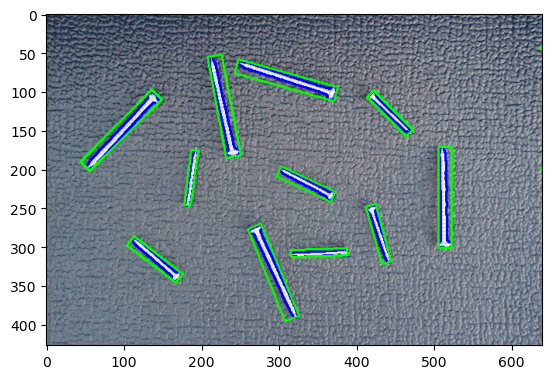

In [155]:
################################################################
#Dans cette partie du code, on isole les vis du reste du décors
################################################################

img_out = images[0]
image = cv2.convertScaleAbs(img_comb)

cont,_ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_out, cont, -1, (0,0,255), 2)
plt.imshow(img_out)

for c in cont:
    # Trouver le rectangle orienté minimal
    rect = cv2.minAreaRect(c)
    center, size, angle = rect
 
    # Dessiner le rectangle orienté sur l'image
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img_out, [box], -1, (0, 255, 0), 2)
    
    print("Longueur",size[0],",",size[1],"\n")

plt.imshow(img_out)